# Static Data

<img src="wilder_tempdata/Boston-at-Night.jpg">


### Import Packages ###

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Obtaining and Cleaning the Data ###

A variety of datasets pertaining to crime are available through Boston's open data portal as well as the web at large. The first dataset that we chose to obtain and clean was the comprehensive log of all crime incidents in Boston from July 2012 to August 2015.


First, we downloaded this data and read in the csv file to the ipython notebook.

In [4]:
#dftouse=pd.read_csv("Crime_Incident_Reports.csv")
dftouse=pd.read_csv("JRcleaningcontinued.csv")

Since our models relied on the fact that every crime incident would be geotagged, we dropped all crime incident reports which did not include a geotag. 

In [16]:
new_df = dftouse.drop(dftouse[dftouse['Location']=='(0.0, 0.0)'].index)

Here we assign a "severity score" to each type of crime. These scores were compiled using the following sources: 
* http://www.mass.gov/courts/docs/admin/sentcomm/mastercrimelist.pdf


In [91]:
new_df['INCIDENT_TYPE_DESCRIPTION'] = new_df['INCIDENT_TYPE_DESCRIPTION'].apply(lambda x: x.lower())

new_df['SCORE'] = 'NaN'
#new_df.iloc(new_df['INCIDENT_TYPE_DESCRIPTION']=='HOMICIDE')
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='homicide', 'SCORE'] = 10

new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='rape and attempted', 'SCORE'] = 9
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='aggravated assault', 'SCORE'] = 9
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='manslaug', 'SCORE'] = 9

truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='FIGHT ')
new_df.ix[truelist, 'SCORE'] = 8
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='robbery', 'SCORE'] = 8

new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='crimes against children', 'SCORE'] = 7

truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='ROBBER')
new_df.ix[truelist, 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='arson', 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='residential burglary', 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='commercial burglary', 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other burglary', 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harbor related incidents', 'SCORE'] =6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='indecent assault', 'SCORE'] = 6
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='auto theft', 'SCORE'] = 6

new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='simple assault', 'SCORE'] = 5
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='drug violation', 'SCORE'] = 5
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='drug charges', 'SCORE'] = 5
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='explos', 'SCORE'] = 5
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='explosives', 'SCORE'] = 5
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='offenses against child/family', 'SCORE'] = 5

truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='ARREST')
new_df.ix[truelist, 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='counterfeiting', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='larceny', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other larceny', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='firearm violations', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='weapons charge', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prostitution', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prostitution charges', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='criminal harassment', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='bomb hoax', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='biothreat', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='restrain', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='auto theft recovery', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='warrant arrests', 'SCORE'] = 4
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='larceny from motor vehicle', 'SCORE'] = 4

truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='aircraft') & (new_df['NatureCode']=='HITRUN')
new_df.ix[truelist, 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='arrest', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='firearm discovery', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='confidence games', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='ballist', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='ballistics', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='sex offender registration', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='sexreg', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='restraining order violations', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harass', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='forgery', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='embezellment', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='embezzlement', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='operating under the influence', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='operating under influence', 'SCORE'] = 3
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fraud', 'SCORE'] = 3

truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='THREAT')
new_df.ix[truelist, 'SCORE'] = 2
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='DISTRB')
new_df.ix[truelist, 'SCORE'] = 2
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='FIGHT ')
new_df.ix[truelist, 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='recovered stolen property', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='vandalism', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='benoprop', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='searchwarr', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='stolen property charges', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='violation of liquor laws', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='liquor violation', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='licviol', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='search warrants', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='police service incidents', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='assembly or gathering violations', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='disorderly', 'SCORE'] = 2
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property related damage', 'SCORE'] = 2

new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation', 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='IVPER ')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='IVPER')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='CURFEW')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='SSTOP')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='MISC')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='LARCRT')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='IVPREM')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='IVPER')
new_df.ix[truelist, 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='investigate person', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invper', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invprop', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invveh', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='investigate property', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='disorderly conduct', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='motor vehicle accident response', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='verbal disputes', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='violations', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='trespass', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='skipfare', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='license violation', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire related reports', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire related reports', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='landlord/tenant disputes', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='missing person reported', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='missing person located', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='persloc', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='val', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='argue', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='mvacc', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='phonecalls', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='medical assistance', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='medassist', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property theft', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='proplost', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='propfound', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property lost', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='towed', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property found', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prisoner related incidents', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='license plate related incidents', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='evading fare', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='propdam', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='plates', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='gambling offense', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='landlord', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='pubdrink', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='gather', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='burgtools', 'SCORE'] = 1
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='runaway', 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation') & (new_df['NatureCode']=='UNK')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation') & (new_df['NatureCode']=='INVEST')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation') & (new_df['NatureCode']=='UNKEMS')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation') & (new_df['NatureCode']=='UNCONS')
new_df.ix[truelist, 'SCORE'] = 1
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='HARPT')
new_df.ix[truelist, 'SCORE'] = 1

# These incidents are either not crimes or are crimes of unknown severity
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harbor', 'SCORE'] = 0
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='aircraft') & (new_df['NatureCode']=='ALERT2')
new_df.ix[truelist, 'SCORE'] = 0
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='aircraft') & (new_df['NatureCode']=='LOGAN')
new_df.ix[truelist, 'SCORE'] = 0
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation') & (new_df['NatureCode']=='CARDIA')
new_df.ix[truelist, 'SCORE'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='persmiss', 'SCORE'] = 0


#new_df[new_df['INCIDENT_TYPE_DESCRIPTION']=='explos']

#new_df[new_df['SCORE']=='NaN']
# grouped.head()

# #new_df[new_df['SCORE']=='NaN'].sort(['INCIDENT_TYPE_DESCRIPTION'])
#new_df[new_df['SCORE']=='NaN']['INCIDENT_TYPE_DESCRIPTION'].value_counts()
new_df['SCORE'].value_counts()

#     #print elm
# #new_df['SCORE'] = 10

1      116968
4       41969
5       29329
2       19918
3       14640
6       13255
9        5725
8        4944
NaN      4358
0        1282
7         548
10        139
dtype: int64

We then calculated the costs associated with each crime based on the following resources:

* http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2835847/
* https://www.fbi.gov/about-us/cjis/ucr/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/index-page

We only took into account the costs that could be prevented if the crimes themselves were not committed. Thus we factor in the costs to victims and society, but not legal or disciplinary costs. 

In [88]:
new_df['INCIDENT_TYPE_DESCRIPTION'] = new_df['INCIDENT_TYPE_DESCRIPTION'].apply(lambda x: x.lower())

new_df['COST'] = 'NaN'
#new_df.iloc(new_df['INCIDENT_TYPE_DESCRIPTION']=='HOMICIDE')
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='homicide', 'COST'] = 737517
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='manslaug', 'COST'] = 737517
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='residential burglary', 'COST'] = 3299
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='commercial burglary', 'COST'] = 3299
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other burglary', 'COST'] = 3299
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harbor related incidents', 'COST'] = 3299
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='indecent assault', 'COST'] = 5556
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property related damage', 'COST'] = 2000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='auto theft recovery', 'COST'] = 0 
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='auto theft', 'COST'] = 6114
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='aggravated assault', 'COST'] = 8700
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='robbery', 'COST'] = 3299
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='crimes against children', 'COST'] = 6000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='rape and attempted', 'COST'] = 5556
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='arson', 'COST'] = 11452
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='simple assault', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='warrant arrests', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='larceny from motor vehicle', 'COST'] = 480
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='drug violation', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='drug charges', 'COST'] = 500
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='ARREST')
new_df.ix[truelist, 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='counterfeiting', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='larceny', 'COST'] = 480
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other larceny', 'COST'] = 480
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='arrest', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='firearm violations', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='weapons charge', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prostitution', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prostitution charges', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='criminal harassment', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='offenses against child/family', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='bomb hoax', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='bomb', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='explos', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='explosives', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='restrain', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='firearm discovery', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='confidence games', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='ballist', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='ballistics', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='sex offender registration', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='sexreg', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='restraining order violations', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harass', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='forgery', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='embezellment', 'COST'] = 2000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='embezzlement', 'COST'] = 2000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='operating under the influence', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='operating under influence', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fraud', 'COST'] = 3000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim', 'COST'] = 500
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='FIGHT ')
new_df.ix[truelist, 'COST'] = 1000
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='hatecrim') & (new_df['NatureCode']=='THREAT')
new_df.ix[truelist, 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='recovered stolen property', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='vandalism', 'COST'] = 1000
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='benoprop', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='searchwarr', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='stolen property charges', 'COST'] = 300
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='violation of liquor laws', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='liquor violation', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='licviol', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='search warrants', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='police service incidents', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='assembly or gathering violations', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='disorderly', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='investigate person', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invper', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invprop', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='invveh', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='investigate property', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='disorderly conduct', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='motor vehicle accident response', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='verbal disputes', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='violations', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='trespass', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='skipfare', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='license violation', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire related reports', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire related reports', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='landlord/tenant disputes', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='missing person reported', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='missing person located', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='persloc', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='val', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='argue', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='mvacc', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='phonecalls', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='medical assistance', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='medassist', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property theft', 'COST'] = 300
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='proplost', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property lost', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='towed', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prisoner related incidents', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='license plate related incidents', 'COST'] = 50
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='evading fare', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='fire', 'COST'] = 100
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='propdam', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='plates', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='gambling offense', 'COST'] = 250
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='landlord', 'COST'] = 20
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='hazardous', 'COST'] = 500
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='biothreat', 'COST'] = 1000
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='CURFEW')
new_df.ix[truelist, 'COST'] = 10
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='SSTOP')
new_df.ix[truelist, 'COST'] = 10
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='MISC')
new_df.ix[truelist, 'COST'] = 10
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='LARCRT')
new_df.ix[truelist, 'COST'] = 10
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='IVPREM')
new_df.ix[truelist, 'COST'] = 10
truelist = (new_df['INCIDENT_TYPE_DESCRIPTION']=='service') & (new_df['NatureCode']=='IVPER')
new_df.ix[truelist, 'COST'] = 10


# These incidents are either not crimes or are crimes of unknown severity
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='harbor', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='pubdrink', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='other', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='propfound', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='property found', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='death investigation', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='gather', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='burgtools', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='prison', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='runaway', 'COST'] = 0
new_df.ix[new_df['INCIDENT_TYPE_DESCRIPTION']=='persmiss', 'COST'] = 0



#new_df[new_df['INCIDENT_TYPE_DESCRIPTION']=='persmiss']

#new_df[new_df['COST']=='NaN']
# grouped.head()

# #new_df[new_df['COST']=='NaN'].sort(['INCIDENT_TYPE_DESCRIPTION'])
#new_df[new_df['COST']=='NaN']['INCIDENT_TYPE_DESCRIPTION'].value_counts()

new_df['COST'].value_counts()

#     #print elm
# #new_df['COST'] = 10

50        78840
480       37543
1000      31731
20        20227
100       18949
500       16039
3299      13483
0         11027
3000       8497
8700       5716
6114       4661
NaN        3922
300         786
10          644
6000        548
2000        251
737517      147
11452        31
5556         20
250          13
dtype: int64

Now save the dataframe to a csv file. 

In [92]:
# new_df.to_csv("crime_costs.csv", index=False)

##Property Value Dataset 

Next we read in and clean a dataset of property values from the Boston open data portal:

In [96]:
propertyvalues=pd.read_csv("wilder_tempdata/Property_Assessment_2014.csv")

/Users/anthonywohns/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [109]:
propertyvalues['Location'].order(ascending=False).head(10)

123140                              C,3
137133                              C,0
149324                  0,(42.360441000
137134                  0,(42.359400000
137121                  0,(42.359400000
137199                   ,(42.359400000
93795                    ,(42.333860000
50150                    ,(42.280202000
162345    (42.394968000, -71.011287000)
153183    (42.394581000, -71.067571000)
Name: Location, dtype: object

The data is already in an acceptable format (and there are only 8 values without a geotag), so all we have to do is create separate columns for the latitude and longitude.

In [110]:
def splitter_lat(x):
    lat, lon = x.split(',')
    try:
        float(lat[1:])
        return float(lat[1:])
    except ValueError:
        return 0

def splitter_lon(x):
    lat, lon = x.split(',')
    try:
        float(lon[:-1])
        return float(lon[:-1])
    except ValueError:
        return 0

propertyvalues['Lat'] = propertyvalues['Location'].apply(splitter_lat)

propertyvalues['Lon'] = propertyvalues['Location'].apply(splitter_lon)

In [111]:
#propertyvalues.to_csv("propertyvalues.csv")

## Liquor License Data

In [113]:
liquordata=pd.read_csv("wilder_tempdata/Liquor_Licenses.csv")

## Street Light Location Data

### Loading Crime Data CSV and Creating Dictionary ###

We first open our cleaned csv file containing a list of all reported criminal incidents in Boston from 2012 to 2015. Crimes within this dataset were tagged with a specific crime type such as "Armed Robbery." We used these taggings along with Boston Police Department's severity scores for the corresponding crimes to create a dictionary keyed by the location (latitude and longitude) of a crime and having the severity score of the crime. We called this dictionary crimeDict and use it heavily throughout the rest of our project. We decided to use two decimal places for our latitude and longitude in the static model, as this provided 176 different locations (each close to one square kilometer in area). We were fortunate to have static datasets that had very specific latitudes and longitudes so we could have more locations. Our dynamic datasets required us to only use one decimal places for our locations in the dynamic model.

In [4]:
with open('crime_data_weighted_cleaned_nov_27.csv', 'rU') as csvfile:
    reader = csv.DictReader(csvfile)
    crimeDict = {}
    for row in reader:
        # Read in sufficient characters for two decimal places of specificity
        key = ((float(row['LATITUDE'][:5]), float(row['LONGITUDE'][:6])))
        if key in crimeDict:
            # If the score is unavailable, we record it as a 1. If it is, we record the score
            if np.isnan(float(row['SCORE'])):
                crimeDict[key].extend([int(1)])
            else:
                crimeDict[key].extend([int(row['SCORE'])])
        else:
            if np.isnan(float(row['SCORE'])):
                crimeDict[key]= [int(1)]
            else:
                crimeDict[key] = [int(row['SCORE'])]

Before beginning our project, we wanted to have a sense of the distribution of crime in Boston. We recognized that this would perhaps most easily be conveyed with a heatmap. Below is a screenshot of the google map heatmap we created of the crime data. Because we were required to work within the ipython notebook, we created code (shown below map) that would create a string representing the data we wanted to visualize and inject this string within another string representing an html page template. We determined that a dataframe would be easier to use for this visualization and we elected to use all decimal places available to more accurately represent the data. This method of visualization proved to be very convenient in that it allowed us to easily import our heatmap into our webpage. The primary downside of the method was that all of our data existed as a large string within the html file, causing the filesize to be very large.

<img src="bostoncrimeheatmap.png">

In [175]:
crimedf=pd.read_csv('crime_data_weighted_cleaned_nov_27.csv')

In [33]:
# Here we create a function that takes in a given lat, long and returns a string that works with google's api to add data to the
# heat map
def addCoordshm(lat, lon):
    txtstr =  "var LatLng = new google.maps.LatLng("
    txtstr2 = "); \
                heatmapData.push(LatLng);"
    hm_str = txtstr + str(lat) + ',' + str(lon) + txtstr2
    return hm_str

In [177]:
# We initialize a list to store our large string, and then loop through our dataframe rows, adding the above string to our big string
bigstringcrime = []
space = "\n"
for i in range(0, len(crimedf['LATITUDE'])):
    bigstringcrime.append(addCoordshm(crimedf['LATITUDE'][i], crimedf['LONGITUDE'][i]))

In [178]:
# We join the individual appended strings together as one large string and add newline characters between each for formatting
bigstringinputc = space.join(bigstringcrime)

In [179]:
# Below is the page template for an html visualization of the heatmap. We copy only the middle portion for insertion into our website
def get_page_template(x):
    page_template_1 = """
    <html>
      <head>
        <meta charset="utf-8">
            <meta http-equiv="X-UA-Compatible" content="IE=edge">
            <title></title>
            <meta name="description" content="">
            <meta name="viewport" content="width=device-width, initial-scale=1">

            <style>
                html, body, #map-canvas {margin: 0;padding: 0;height: 100%;}
            </style>
        <script src="https://maps.googleapis.com/maps/api/js?v=3.exp&sensor=false&libraries=geometry,visualization"></script>
        <script>
          var geocoder;
          var map;
          function initialize() 
          {
            geocoder = new google.maps.Geocoder();        
            geocoder.geocode( { 'address': "Boston"}, function(results, status) 
            {
              if (status == google.maps.GeocoderStatus.OK) 
              {
                var mapOptions = {
                  zoom: 13,
                  center: results[0].geometry.location,
                  mapTypeId: google.maps.MapTypeId.ROADMAP
                }

                // Let's draw the map
                map = new google.maps.Map(document.getElementById("map-canvas"), mapOptions);
                var heatmapData = [];
                """
            
    page_template_2 = """ 
                var heatmap = new google.maps.visualization.HeatmapLayer({
                  data: heatmapData,
                  map: map,
                  radius: 25
                });
                heatmap.setMap(map);
              }

              else 
              {
                alert("Geocode was not successful for the following reason: " + status);
              }
            });
          }

        initialize();
        </script>
      </head>
    <center>
    <H1 style="margin-top: 25px;">Crime in Boston</H1>
    <body onload="">
    <div id="map-canvas" style="width: 1200px; height: 800px;"></div>
    </body>
    </center>
    </html>
    """
    return page_template_1 + x + page_template_2
def main():
    with open(r'C:\Users\Carl\Desktop\CS109 Final Project\crimeheatmap.html', 'w') as out:
        out.write(get_page_template(bigstringinputc))

In [180]:
main()

### Creating Danger Dictionary ###

From our crime dictionary, we create a danger dictionary which essentially gauges how dangerous a given area is. To calculate this danger score for each area, we add up the severity scores for all of the crimes in the respective area. Then we sought to squash these aggregated scores and assign areas relative danger scores between a range of 1 to 10 inclusive. This proved to be difficult, as there were several very large and very small outliers. We decided to calculate the relative percentile and then divide by ten to obtain a danger score. Although this ends up scaling up some less dangerous areas, we thought that this method was reasonable.

In [5]:
from scipy import stats
dangerDict = {}
dangerDict_scaled = {}
for key in crimeDict:
    dangerDict[key] = sum(crimeDict[key])
for key in dangerDict:
    dangerDict_scaled[key] = stats.percentileofscore(dangerDict.values(), dangerDict[key], 'rank') / 10

Here we save our danger dictionary as a pickle file to be used in the static model.

In [6]:
dangerDict_uPickle = open('dangerDict_u.pkl', 'wb')
pickle.dump(dangerDict, dangerDict_uPickle, -1)
dangerDict_uPickle.close()

In [7]:
dangerDict_scaled

{(42.23, -71.13): 3.5227272727272725,
 (42.23, -71.12): 2.6704545454545454,
 (42.24, -71.14): 1.9034090909090911,
 (42.24, -71.13): 5.1136363636363633,
 (42.24, -71.12): 4.4318181818181817,
 (42.24, -71.11): 3.8636363636363633,
 (42.25, -71.16): 2.3863636363636362,
 (42.25, -71.15): 2.8977272727272729,
 (42.25, -71.14): 4.7727272727272725,
 (42.25, -71.13): 3.75,
 (42.25, -71.12): 7.8977272727272734,
 (42.25, -71.11): 5.3977272727272725,
 (42.25, -71.1): 0.14204545454545453,
 (42.26, -71.17): 2.3011363636363638,
 (42.26, -71.16): 3.4090909090909087,
 (42.26, -71.15): 5.0568181818181817,
 (42.26, -71.14): 2.6136363636363638,
 (42.26, -71.13): 0.79545454545454541,
 (42.26, -71.12): 5.6818181818181817,
 (42.26, -71.11): 5.9090909090909092,
 (42.26, -71.1): 6.3636363636363633,
 (42.26, -71.09): 7.1022727272727266,
 (42.26, -71.08): 1.0227272727272729,
 (42.27, -71.17): 3.8068181818181821,
 (42.27, -71.16): 4.204545454545455,
 (42.27, -71.15): 2.0454545454545459,
 (42.27, -71.14): 3.6931818

Here we save our scaled danger dictionary (by percentiles) to be used in the static model.

In [8]:
dangerDictPickle = open('dangerDict.pkl', 'wb')
pickle.dump(dangerDict_scaled, dangerDictPickle, -1)
dangerDictPickle.close()

In [9]:
print(min(dangerDict.values()),
max(dangerDict.values()))

(1, 31530)


We also thought it might be interesting to look at the frequency of crimes in each region, so we created a frequency dictionary and stored it as a pickle file for use in our model.

In [10]:
freqDict = {}
for key in crimeDict:
    freqDict[key] = len(crimeDict[key])

In [11]:
freqDictPickle = open('freqDict.pkl', 'wb')
pickle.dump(freqDict, freqDictPickle, -1)
freqDictPickle.close()

### Loading Static Variables and Creating Feature Dictionary ###

Now we look at our first static variable, property data. We begin a feature dictionary that will be keyed by our lat, longs from above and have data for all of our static features. For property values we look at a given location and average all of the property values within that area.

In [22]:
with open('propertyvalues.csv', 'rU') as csvfile:
    reader = csv.DictReader(csvfile)
    featureDict = {}
    for row in reader:
        key = ((float(row['Lat'][:5]), float(row['Lon'][:6])))
        if key in crimeDict:
            if key in featureDict:
                featureDict[key].extend([int(row['AV_TOTAL'])])
            else:
                featureDict[key] = [int(row['AV_TOTAL'])]
        else:
            pass

In [23]:
for key in featureDict:
    featureDict[key] = [np.mean(featureDict[key])]

Similarly, we read in our liquor data which contains the geographic location of all liquor stores in Boston. We are interested in how the distribution of these stores around the city may impact crime

In [24]:
# Count the number of liquor stores in each area and append to the list containing property value
with open('liquor_data_cleaned.csv', 'rU') as csvfile:
    readertwo = csv.DictReader(csvfile)
    for row in readertwo:
        key = ((float(row['Lat'][:5]), float(row['Lng'][:6])))
        if key in featureDict:
            if len(featureDict[key]) == 1:
                featureDict[key].append(1)
            else:
                featureDict[key][1] += 1

In [25]:
# If there's no liquor store in a given area, record 0
for key in featureDict:
    if len(featureDict[key]) ==1:
        featureDict[key].append(0)

In [26]:
featureDict

{(42.23, -71.13): [405563.7603550296, 0],
 (42.23, -71.12): [477299.9418604651, 0],
 (42.24, -71.14): [307264.03555555554, 0],
 (42.24, -71.13): [345830.53454545455, 0],
 (42.24, -71.12): [279372.65255474451, 0],
 (42.24, -71.11): [373794.67924528301, 0],
 (42.25, -71.16): [286272.70270270272, 0],
 (42.25, -71.15): [407718.27868852462, 0],
 (42.25, -71.14): [390782.06804733729, 0],
 (42.25, -71.13): [489025.94218415418, 0],
 (42.25, -71.12): [383927.79764453962, 1],
 (42.25, -71.11): [334080.7107329843, 0],
 (42.25, -71.1): [247540.95454545456, 0],
 (42.26, -71.17): [646297.82608695654, 0],
 (42.26, -71.16): [212598.47085610201, 0],
 (42.26, -71.15): [239361.60463045415, 0],
 (42.26, -71.14): [337458.85416666669, 0],
 (42.26, -71.13): [629250.42735042737, 0],
 (42.26, -71.12): [264007.97101449274, 0],
 (42.26, -71.11): [314186.5847715736, 0],
 (42.26, -71.1): [245245.2150627615, 0],
 (42.26, -71.09): [334294.23060344829, 1],
 (42.26, -71.08): [282281.81818181818, 0],
 (42.27, -71.17): 

Now we add in street light data as a final feature for modeling.

In [27]:
with open('streetlight_data.csv','rU') as csvfile:
    readerthree = csv.DictReader(csvfile)
    for row in readerthree:
        key = ((float(row['Lat'][:5]), float(row['Long'][:6])))
        if key in featureDict:
            if len(featureDict[key]) == 2:
                featureDict[key].append(1)
            else:
                featureDict[key][2] += 1

If there's no street light in a given area, record 0.

In [28]:
for key in featureDict:
    if len(featureDict[key]) ==2:
        featureDict[key].append(0)

In [29]:
featureDict

{(42.23, -71.13): [405563.7603550296, 0, 141],
 (42.23, -71.12): [477299.9418604651, 0, 12],
 (42.24, -71.14): [307264.03555555554, 0, 1],
 (42.24, -71.13): [345830.53454545455, 0, 137],
 (42.24, -71.12): [279372.65255474451, 0, 184],
 (42.24, -71.11): [373794.67924528301, 0, 7],
 (42.25, -71.16): [286272.70270270272, 0, 11],
 (42.25, -71.15): [407718.27868852462, 0, 13],
 (42.25, -71.14): [390782.06804733729, 0, 223],
 (42.25, -71.13): [489025.94218415418, 0, 75],
 (42.25, -71.12): [383927.79764453962, 1, 352],
 (42.25, -71.11): [334080.7107329843, 0, 60],
 (42.25, -71.1): [247540.95454545456, 0, 8],
 (42.26, -71.17): [646297.82608695654, 0, 46],
 (42.26, -71.16): [212598.47085610201, 0, 75],
 (42.26, -71.15): [239361.60463045415, 0, 88],
 (42.26, -71.14): [337458.85416666669, 0, 67],
 (42.26, -71.13): [629250.42735042737, 0, 19],
 (42.26, -71.12): [264007.97101449274, 0, 130],
 (42.26, -71.11): [314186.5847715736, 0, 85],
 (42.26, -71.1): [245245.2150627615, 0, 121],
 (42.26, -71.09)

As a core part of our modeling stage, we pickle the feature dictionary for use in the static model.

In [30]:
featureDictPickle = open('featureDict.pkl', 'wb')
pickle.dump(featureDict, featureDictPickle, -1)
featureDictPickle.close()

### Liquor Data Visualization ###

To more easily create a heatmap to visualize liquor store location in Boston, we create a dataframe of liquor data and apply our previously defined addCoordshm function and get_page_template function used to visualize crimes in Boston.

In [44]:
liquordf=pd.read_csv('liquor_data_cleaned.csv')
bigstringl = []
space = "\n"
for i in range(0, len(liquordf['Lat'])):
    bigstringl.append(addCoordshm(liquordf['Lat'][i], liquordf['Lng'][i]))


In [45]:
bigstringinputl = space.join(bigstringl)

In [46]:
def get_page_template(x):
    page_template_1 = """
    <html>
      <head>
        <meta charset="utf-8">
            <meta http-equiv="X-UA-Compatible" content="IE=edge">
            <title></title>
            <meta name="description" content="">
            <meta name="viewport" content="width=device-width, initial-scale=1">

            <style>
                html, body, #map-canvas {margin: 0;padding: 0;height: 100%;}
            </style>
        <script src="https://maps.googleapis.com/maps/api/js?v=3.exp&sensor=false"></script>
        <script>
          var geocoder;
          var map;
          function initialize() 
          {
            geocoder = new google.maps.Geocoder();        
            geocoder.geocode( { 'address': "Boston"}, function(results, status) 
            {
              if (status == google.maps.GeocoderStatus.OK) 
              {
                var mapOptions = {
                  zoom: 13,
                  center: results[0].geometry.location,
                  mapTypeId: google.maps.MapTypeId.ROADMAP
                }

                // Let's draw the map
                map = new google.maps.Map(document.getElementById("map-canvas"), mapOptions);
                """
            
    page_template_2 = """ }

              else 
              {
                alert("Geocode was not successful for the following reason: " + status);
              }
            });
          }

        initialize();
        </script>
      </head>
    <center>
    <H1 style="margin-top: 25px;">Boston Liquor Stores</H1>
    <body onload="">
    <div id="map-canvas" style="width: 1200px; height: 800px;"></div>
    </body>
    </center>
    </html>
    """
    return page_template_1 + x + page_template_2
def main():
    with open(r'C:\Users\Carl\Desktop\CS109 Final Project\liquorviz.html', 'w') as out:
        out.write(get_page_template(bigstringinputl))

In [47]:
main()

Screenshot of the resulting heatmap visualization:

<img src="bostonliquorheatmap.png">

We believed that a bar chart might make it easier to quantify the differences in number of locations for the various regions. The x-axis is not labeled due to the difficulty in distinguishing regions based solely on latitude and longitude. This is simply to illustrate the distribution.

In [186]:
import pickle
featureDict = pickle.load(open('featureDict.pkl', 'rb'))

In [187]:
liquorvals = []
for val in featureDict.values():
    liquorvals.append(val[1])

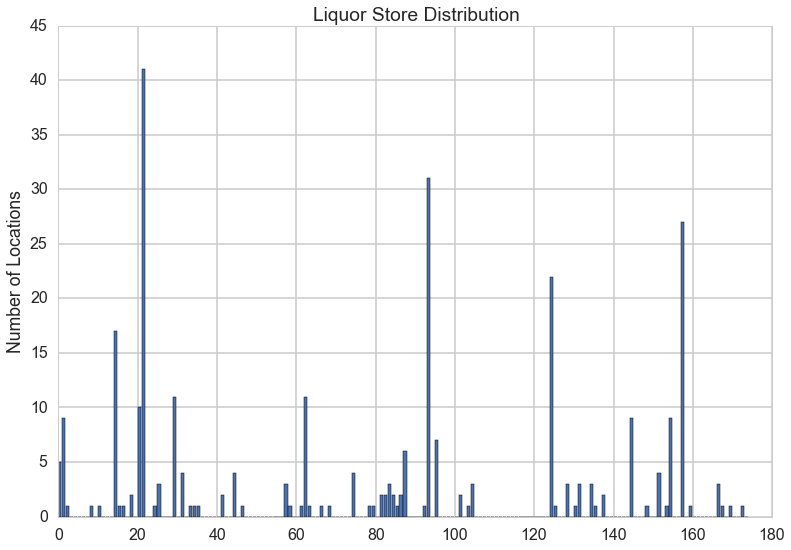

In [190]:
plt.bar(range(len(featureDict)), liquorvals)
plt.ylabel("Number of Locations")
plt.title("Liquor Store Distribution")
plt.show()

### Street Light Data Visualization

We again elected to use a barchart to depict the distribution of property values in our different regions. 

In [49]:
streetlightvals = []
for val in featureDict.values():
    streetlightvals.append(val[2])

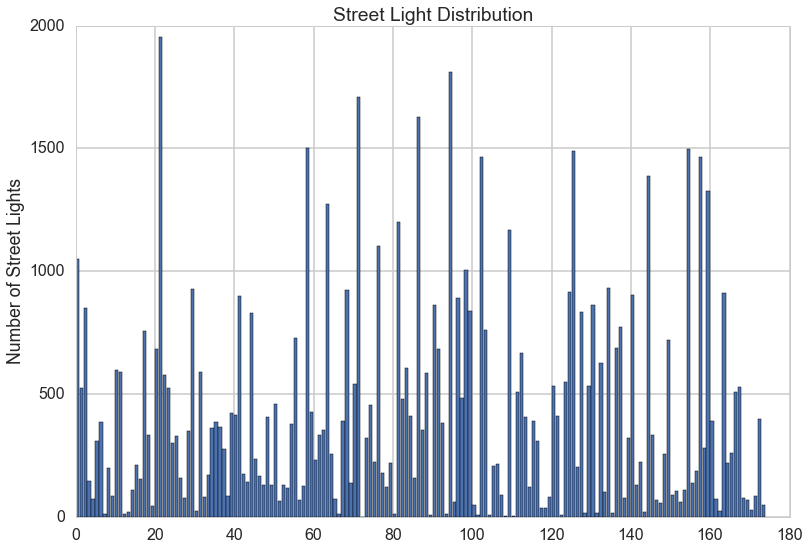

In [51]:
plt.bar(range(len(featureDict)), streetlightvals)
plt.ylabel("Number of Street Lights")
plt.title("Street Light Distribution")
plt.show()

### Property Data Visualization ###

Similar to the above, we elected to use a barchart to depict the distribution of property values in our different regions. 

In [192]:
propertyvals = []
for val in featureDict.values():
    propertyvals.append(val[0])

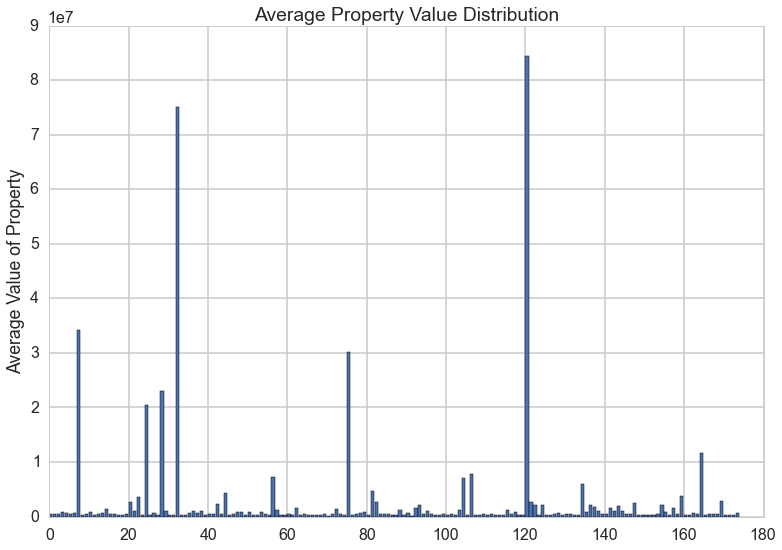

In [193]:
plt.bar(range(len(featureDict)), propertyvals)
plt.ylabel("Average Value of Property")
plt.title("Average Property Value Distribution")
plt.show()